In [13]:
import numpy as np
from statistics import mean
import random
import pandas as pd
import matplotlib.pyplot as plt

In [14]:

def evaluate(y_pred , y):
    i=0
    true_positives= false_positives = true_negatives =false_negatives=0
    for x in y_pred :
        if x==1:
            if y[i] == 1:
                true_positives+=1
            else:
                false_positives+=1
        else:
            if y[i] == 1:
                false_negatives+=1
            else:
                true_negatives+=1
        i+=1
    
    precision = true_positives/(true_positives+ false_positives)
    recall = true_positives/(true_positives+false_negatives)
    f1 = 2/((1/recall) + (1/precision))
    accuracy= (true_positives+true_negatives)/(true_negatives+true_positives+false_negatives+false_positives)
    
    return precision, recall, f1, accuracy
        
def loss_function_LR(h , y) : 
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).sum()

def predict(weights  , bias , X):
        w = np.dot(X , weights) + bias
        y_pred = 1/(1+np.exp(-w))
        binary_pred = [1 if i>0.5 else 0 for i in y_pred]
        return binary_pred


In [15]:

def LogisticRegressionGD(lr  , iterations  , X  , y) :
  
    rows , features  = X.shape 
    weights = np.zeros(features)  
    bias = 0 
    y = y.reshape((y.shape[0],))
    l = []
    a = []
    for i in range(iterations):
        w = np.dot(X , weights) + bias   
        y_pred = 1/(1+np.exp(-w))    
        delta_w = np.dot(X.T , y_pred - y)
        delta_b = np.sum(y_pred - y)
        weights = weights - lr*(delta_w)
        bias = bias - lr*(delta_b)
        binary_pred = [1 if i>0.5 else 0 for i in y_pred]  
        if i%50 == 0 :
            l.append(loss_function_LR(y_pred , y))     
            a.append(((binary_pred == y).sum()/len(y)))    
      
    return weights,bias,l,a
    

In [16]:

def LogisticRegressionSGD(lr, iterations  , X  , y) :
    l=[]
    a=[]
    rows , features  = X.shape 
    weights = np.zeros(features)  
    bias = 0    
    y = y.reshape((y.shape[0],))
    iter_no = 0
    
    for i in range(iterations):
         
        random_number = random.randint(0, len(y)-1)   
        x_b, y_b = X[random_number], y[random_number]
        w = np.dot(x_b, weights) + bias 
        y_pred = 1/(1+np.exp(-w))   
        delta_w = np.dot(x_b.T , y_pred - y_b)
        delta_b = np.sum(y_pred - y_b)
        weights = weights - lr*(delta_w)
        bias = bias - lr*(delta_b)
            
        binary_pred = predict(weights,bias,X) 
            
        iter_no+=1
            
        if iter_no%50==0:
            l.append(loss_function_LR(y_pred , y_b))
            precision, recall, f1, accuracy = evaluate(binary_pred , y)
            a.append(accuracy)
    return weights,bias,l,a      


In [17]:
'''
Standardize the values
Reading the dataset
'''
df = pd.read_csv('dataset_LR.csv')
'''
col_names = np.array(df.columns)
col_names = col_names[:-1]
for i in col_names:
    col = np.array(df[i])
    mean_col = np.mean(col)
    std_col = np.std(col)
    norm_col = []
    for j in col:
        norm_col.append((j-mean_col)/std_col)
    df[i] = norm_col
'''


'\ncol_names = np.array(df.columns)\ncol_names = col_names[:-1]\nfor i in col_names:\n    col = np.array(df[i])\n    mean_col = np.mean(col)\n    std_col = np.std(col)\n    norm_col = []\n    for j in col:\n        norm_col.append((j-mean_col)/std_col)\n    df[i] = norm_col\n'

In [18]:
Accuracy =[]
Accuracy_t =[]
AccuracySGD=[]
AccuracySGD_t=[]

Loss=[]
LossSGD =[]

Fscore = []
Fscore_t = []
FscoreSGD=[]
FscoreSGD_t=[]

Precision=[]
Precision_t=[]
PrecisionSGD =[]
PrecisionSGD_t =[]

Recall=[]
Recall_t=[]
RecallSGD=[]
RecallSGD_t=[]

wGD=[]
bGD=[]
wSGD=[]
bSGD=[]

for j in range(10):     
    lrate= 0.001
    no_iter=10000
    df_random = df.sample(frac=1)
    rows , cols = df_random.shape
    a = int((70*rows)/100) # implementing the 70-30 split on the dataset
    df_train =  df_random.head(a)
    df_test =  df_random.tail(rows-a)

    X = df_train.iloc[: , 0:4]
    y = df_train.iloc[: ,-1:]
    np_X = X.to_numpy()
    np_y = y.to_numpy()
    weights,bias,los, acc = LogisticRegressionGD(lrate , no_iter , np_X , np_y)
    wGD.append(weights)
    bGD.append(bias)
    weightsSGD , biasSGD , lSGD , aSGD = LogisticRegressionSGD(lrate , no_iter, np_X , np_y)
    wSGD.append(weightsSGD)
    bSGD.append(biasSGD)

    print(" ")
    print("-------------------------------Random shuffle :",j+1,"----------------------------------------------------")
    print("...................Gradient Descent...................")
    
    print("Gradient Descent weights:",weights)
    print("Loss :",los[-1])
    
    print("Training ")
    
    predicted = predict(weights , bias , np_X)
    precision, recall, f1, accuracy = evaluate(predicted , np_y)
    
  
    #printing evaluation metrics
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
    
    #appending evaluation metrics list
    Accuracy.append(accuracy)
    Loss.append(los[-1])
    Fscore.append(f1)
    Precision.append(precision)
    Recall.append(recall)
    

    print("Testing ")
    
    X_test = df_test.iloc[: , 0:4]
    y_test = df_test.iloc[: , -1:]

    np_X_t = X_test.to_numpy()
    np_y_t = y_test.to_numpy()
    np_y_t = np_y_t.reshape((np_y_t.shape[0],))
        
    predicted = predict(weights , bias , np_X_t)
    precision, recall, f1, accuracy = evaluate(predicted , np_y_t)
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
    print(" ")
    Accuracy_t.append(accuracy)
    Fscore_t.append(f1)
    Precision_t.append(precision)
    Recall_t.append(recall)
    
    print("...................Stochastic Gradient Descent...................")
    
    print("Stochastic Gradient Descent Weights : ",weightsSGD)
    print("Loss :",lSGD[-1])

    
    print("Training dataset")
    
    predicted = predict(weightsSGD , biasSGD , np_X)
    precision, recall, f1, accuracy = evaluate(predicted , np_y)
  
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
    AccuracySGD.append(accuracy)
    LossSGD.append(lSGD[-1])
    FscoreSGD.append(f1)
    PrecisionSGD.append(precision)
    RecallSGD.append(recall)
    
    print("Testing dataset")
    predicted = predict(weightsSGD , biasSGD , np_X_t)
    precision, recall, f1, accuracy = evaluate(predicted , np_y_t)
    print("Recall :",recall)
    print("Precision :",precision)
    print("F1 score :",f1)
    print("Accuracy : ",accuracy)
    print(" ")
    AccuracySGD_t.append(accuracy)
    FscoreSGD_t.append(f1)
    PrecisionSGD_t.append(precision)
    RecallSGD_t.append(recall)
    

 
-------------------------------Random shuffle : 1 ----------------------------------------------------
...................Gradient Descent...................
Gradient Descent weights: [-7.69118438 -4.13012347 -5.14893059 -0.66956921]
Loss : 10.39191638397404
Training 
Recall : 0.9976635514018691
Precision : 0.9953379953379954
F1 score : 0.9964994165694283
Accuracy :  0.996875
Testing 
Recall : 0.967032967032967
Precision : 0.9832402234636871
F1 score : 0.9750692520775622
Accuracy :  0.9781553398058253
 
...................Stochastic Gradient Descent...................
Stochastic Gradient Descent Weights :  [-1.19639978 -0.61730459 -0.63437848 -0.29254776]
Loss : 0.006507910532627182
Training dataset
Recall : 0.9626168224299065
Precision : 0.988009592326139
F1 score : 0.9751479289940826
Accuracy :  0.978125
Testing dataset
Recall : 0.9395604395604396
Precision : 0.9553072625698324
F1 score : 0.9473684210526315
Accuracy :  0.9538834951456311
 
 
-------------------------------Random sh

 
-------------------------------Random shuffle : 10 ----------------------------------------------------
...................Gradient Descent...................
Gradient Descent weights: [-7.5611195  -4.01559215 -5.11041401 -0.55640335]
Loss : 15.929740007294123
Training 
Recall : 0.988009592326139
Precision : 0.9951690821256038
F1 score : 0.9915764139590854
Accuracy :  0.9927083333333333
Testing 
Recall : 0.9896373056994818
Precision : 0.9845360824742269
F1 score : 0.9870801033591732
Accuracy :  0.9878640776699029
 
...................Stochastic Gradient Descent...................
Stochastic Gradient Descent Weights :  [-1.21292205 -0.62678938 -0.62143787 -0.19598106]
Loss : 0.03559408054742769
Training dataset
Recall : 0.9520383693045563
Precision : 0.9826732673267327
F1 score : 0.9671132764920828
Accuracy :  0.971875
Testing dataset
Recall : 0.9326424870466321
Precision : 0.9836065573770492
F1 score : 0.9574468085106385
Accuracy :  0.9611650485436893
 


In [19]:
#GD

final_wGD=[0,0,0,0]  
for i in range(10):
    final_wGD=final_wGD+wGD[i]   
final_wGD=final_wGD/10
final_bGD=mean(bGD)

#SGD

final_wSGD=[0,0,0,0]
for i in range(10):
    final_wSGD=final_wSGD+wSGD[i]    
final_wSGD=final_wSGD/10
final_bSGD=mean(bSGD)


In [20]:
print("Average statistics :")

print(" ")
print("......................................Gradient Decent...................................... ")
print(" ")

print("GD weights: ",final_wGD)
print("GD bias: ",final_bGD)
print("Loss :",mean(Loss))
print(" ")

print("_________________Training GD___________________")
print("Accuracy :" ,mean(Accuracy))
print("Precision :",mean(Precision))
print("Recall :",mean(Recall))
print("F score :",mean(Fscore))

print(" ")
print("_________________Testing GD___________________")
print("Accuracy :" ,mean(Accuracy_t))
print("Precision :",mean(Precision_t))
print("Recall :",mean(Recall_t))
print("F score :",mean(Fscore_t))

print(" ")
print("................................Stochastic Gradient Decent................................ ")
print(" ")

print("SGD weights: ",final_wSGD)
print("SGD bias: ",final_bSGD)
print("Loss :",mean(LossSGD))
print(" ")

print("_________________Training SGD___________________")
print("Accuracy :" ,mean(AccuracySGD))
print("Precision :",mean(PrecisionSGD))
print("Recall :",mean(RecallSGD))
print("F score :",mean(FscoreSGD))

print(" ")
print("_________________Testing SGD___________________")
print("Accuracy :" ,mean(AccuracySGD_t))
print("Precision :",mean(PrecisionSGD_t))
print("Recall :",mean(RecallSGD_t))
print("F score :",mean(FscoreSGD_t))

Average statistics :
 
......................................Gradient Decent...................................... 
 
GD weights:  [-7.16864842 -3.83634592 -4.82870002 -0.53334033]
GD bias:  6.64840309669615
Loss : 16.276511062321863
 
_________________Training GD___________________
Accuracy : 0.9909375
Precision : 0.9894871834747726
Recall : 0.9901634787723146
F score : 0.9898224316601455
 
_________________Testing GD___________________
Accuracy : 0.9888349514563107
Precision : 0.9890859185380659
Recall : 0.9857455146894869
F score : 0.9873784250129227
 
................................Stochastic Gradient Decent................................ 
 
SGD weights:  [-1.18386505 -0.6310607  -0.64880702 -0.27337354]
SGD bias:  0.5281428704859428
Loss : 0.04167305096652388
 
_________________Training SGD___________________
Accuracy : 0.9741666666666666
Precision : 0.9822836374332545
Recall : 0.9592424797254689
F score : 0.9706152150694962
 
_________________Testing SGD___________________
Accu

-----------------Learning Rate : 0.001 ---------------------
 
Gradient Descent weights:  [-6.281216   -3.29582693 -4.20840585 -0.36628221]
Gradient Descent accuracy:  0.9895833333333334


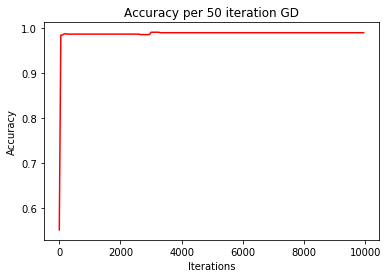

Stochastic Gradient Descent weights:  [-1.19111318 -0.6193117  -0.64733538 -0.21904537]
Stochastic Gradient Descent accuracy:  0.971875


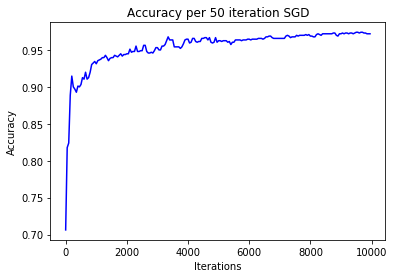

-----------------Learning Rate : 0.0001 ---------------------
 
Gradient Descent weights:  [-4.03742818 -2.20399978 -2.72365485 -0.24424257]
Gradient Descent accuracy:  0.9864583333333333


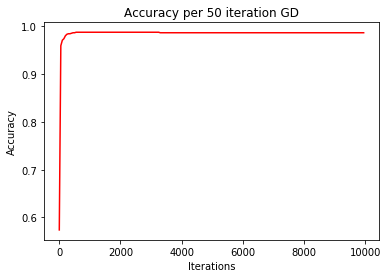

Stochastic Gradient Descent weights:  [-0.47341234 -0.2479928  -0.18522777 -0.09055449]
Stochastic Gradient Descent accuracy:  0.9291666666666667


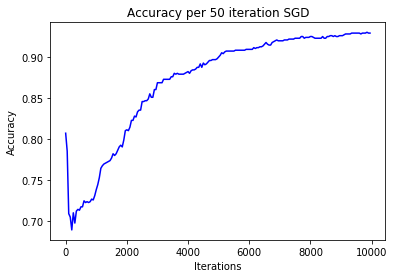

-----------------Learning Rate : 1e-05 ---------------------
 
Gradient Descent weights:  [-2.09448419 -1.22241541 -1.41972772 -0.20044328]
Gradient Descent accuracy:  0.990625


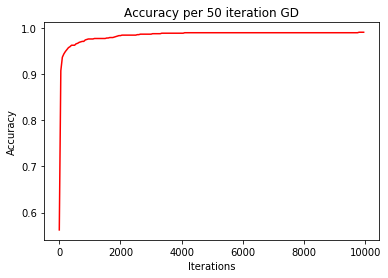

Stochastic Gradient Descent weights:  [-0.0902559  -0.08643323 -0.00134453 -0.00541698]
Stochastic Gradient Descent accuracy:  0.7625


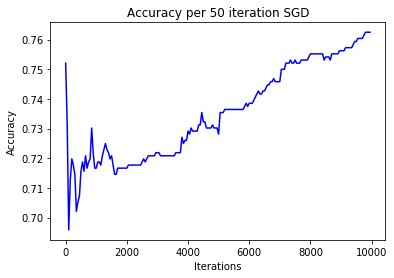

In [22]:

LearningRate = [0.001 , 0.0001 , 0.00001]

for lrate in LearningRate :
    print('-----------------Learning Rate :',lrate,'---------------------')
    print(' ')
    
    df_random = df.sample(frac=1)
    rows , cols = df_random.shape
    a = int((70*rows)/100)
    df_train =  df_random.head(a)
    df_test =  df_random.tail(rows-a)

    X = df_train.iloc[: , 0:4]
    y = df_train.iloc[: ,-1:]

    np_X = X.to_numpy()
    np_y = y.to_numpy()
    
    weights , bias , los, acc= LogisticRegressionGD(lrate , no_iter , np_X , np_y)
    weightsSGD , biasSGD , lSGD , aSGD = LogisticRegressionSGD(lrate ,no_iter , np_X , np_y)

    iter = []
    for i in range(len(los)):
        iter.append(i*50)
 
    print("Gradient Descent weights: ",weights)
    print("Gradient Descent accuracy: ",(acc[-1]))
    plt.plot(iter,acc,label="Gradient Descent",color='red')
    plt.title("Accuracy per 50 iteration GD")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.show()
        

    print("Stochastic Gradient Descent weights: ",weightsSGD)
    print("Stochastic Gradient Descent accuracy: ",(aSGD[-1]))
    plt.plot(iter,aSGD,label="Stochastic Gradient Descent",color='blue')
    plt.title("Accuracy per 50 iteration SGD")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.show()
    

    


    